In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('salaries.csv')
dataset=pd.read_csv('countries.csv')

In [3]:
dataset.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [6]:
#dataset = dataset.drop(['latitude','longitude'],axis=1)

In [4]:
dataset.set_index('country')

,latitude,longitude,name
country,,,
AD,42.546245,1.601554,Andorra
AE,23.424076,53.847818,United Arab Emirates
AF,33.939110,67.709953,Afghanistan
AG,17.060816,-61.796428,Antigua and Barbuda
AI,18.220554,-63.068615,Anguilla
...,...,...,...
YE,15.552727,48.516388,Yemen
YT,-12.827500,45.166244,Mayotte
ZA,-30.559482,22.937506,South Africa


In [26]:
type(zip(dataset.country,dataset.name))

zip

In [27]:
con_list=list(zip(dataset.country,dataset.name))

In [29]:
con_list[0]

('AD', 'Andorra')

In [5]:
con_dict = dict(zip(dataset.country,dataset.name))

In [6]:
con_dict

{'AD': 'Andorra',
 'AE': 'United Arab Emirates',
 'AF': 'Afghanistan',
 'AG': 'Antigua and Barbuda',
 'AI': 'Anguilla',
 'AL': 'Albania',
 'AM': 'Armenia',
 'AN': 'Netherlands Antilles',
 'AO': 'Angola',
 'AQ': 'Antarctica',
 'AR': 'Argentina',
 'AS': 'American Samoa',
 'AT': 'Austria',
 'AU': 'Australia',
 'AW': 'Aruba',
 'AZ': 'Azerbaijan',
 'BA': 'Bosnia and Herzegovina',
 'BB': 'Barbados',
 'BD': 'Bangladesh',
 'BE': 'Belgium',
 'BF': 'Burkina Faso',
 'BG': 'Bulgaria',
 'BH': 'Bahrain',
 'BI': 'Burundi',
 'BJ': 'Benin',
 'BM': 'Bermuda',
 'BN': 'Brunei',
 'BO': 'Bolivia',
 'BR': 'Brazil',
 'BS': 'Bahamas',
 'BT': 'Bhutan',
 'BV': 'Bouvet Island',
 'BW': 'Botswana',
 'BY': 'Belarus',
 'BZ': 'Belize',
 'CA': 'Canada',
 'CC': 'Cocos [Keeling] Islands',
 'CD': 'Congo [DRC]',
 'CF': 'Central African Republic',
 'CG': 'Congo [Republic]',
 'CH': 'Switzerland',
 'CI': "Côte d'Ivoire",
 'CK': 'Cook Islands',
 'CL': 'Chile',
 'CM': 'Cameroon',
 'CN': 'China',
 'CO': 'Colombia',
 'CR': 'Costa

In [7]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Data Engineer,74000,GBP,95535,GB,0,GB,M
1,2022,MI,FT,Data Engineer,50000,GBP,64551,GB,0,GB,M
2,2022,MI,FT,Data Scientist,58000,EUR,63143,DE,100,DE,S


In [8]:
df['company_location']=df['company_location'].map(con_dict)
df['employee_residence']=df['employee_residence'].map(con_dict)

In [9]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Data Engineer,74000,GBP,95535,United Kingdom,0,United Kingdom,M
1,2022,MI,FT,Data Engineer,50000,GBP,64551,United Kingdom,0,United Kingdom,M
2,2022,MI,FT,Data Scientist,58000,EUR,63143,Germany,100,Germany,S


In [16]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

In [21]:

df['experience_level'].unique()

array(['MI', 'SE', 'EX', 'EN'], dtype=object)

In [23]:
experience_level_dict = {'MI':'Mid-level',
                         'SE':'Senior-level',
                         'EX':'Executive-level',
                         'EN':'Entry-level'
}
df['experience_level']=df['experience_level'].map(experience_level_dict)

In [25]:
df['employment_type'].unique()

array(['FT', 'PT', 'CT', 'FL'], dtype=object)

In [30]:
employement_type_dict = {'FT':'Full-time',
                         'PT':'Part-time',
                         'CT':'Contract',
                         'FL':'Freelancing'
}

In [31]:
df['employment_type']=df['employment_type'].map(employement_type_dict)

In [33]:
df['company_size'].unique()

array(['M', 'S', 'L'], dtype=object)

In [35]:
company_size_dict={'M':'Medium',
                   'S':'Small',
                   'L':'Large'    
}
df['company_size']=df['company_size'].map(company_size_dict)

In [36]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,Mid-level,Full-time,Data Engineer,74000,GBP,95535,United Kingdom,0,United Kingdom,Medium
1,2022,Mid-level,Full-time,Data Engineer,50000,GBP,64551,United Kingdom,0,United Kingdom,Medium
2,2022,Mid-level,Full-time,Data Scientist,58000,EUR,63143,Germany,100,Germany,Small


## What all information are available? 

In [37]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           669 non-null    int64 
 1   experience_level    669 non-null    object
 2   employment_type     669 non-null    object
 3   job_title           669 non-null    object
 4   salary              669 non-null    int64 
 5   salary_currency     669 non-null    object
 6   salary_in_usd       669 non-null    int64 
 7   employee_residence  669 non-null    object
 8   remote_ratio        669 non-null    int64 
 9   company_location    669 non-null    object
 10  company_size        669 non-null    object
dtypes: int64(4), object(7)
memory usage: 57.6+ KB


# categorical features

<AxesSubplot:>

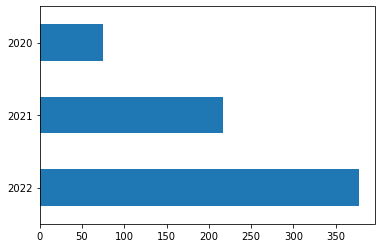

In [41]:
df['work_year'].value_counts().plot(kind='barh')

<AxesSubplot:>

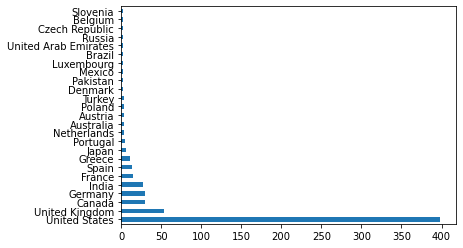

In [45]:
df['company_location'].value_counts()[0:25].plot(kind='barh')

In [6]:
df['company_location'].value_counts()

US    398
GB     54
DE     30
CA     30
IN     27
FR     15
ES     14
GR     11
JP      6
PT      5
NL      4
PL      4
AT      4
AU      4
TR      4
AE      3
MX      3
PK      3
LU      3
DK      3
BR      3
BE      2
SG      2
CH      2
RU      2
SI      2
CN      2
NG      2
CZ      2
IT      2
CO      1
RO      1
IQ      1
HR      1
EE      1
NZ      1
ID      1
EG      1
KE      1
HU      1
UA      1
MT      1
AS      1
MY      1
IL      1
VN      1
HN      1
IE      1
IR      1
MD      1
CU      1
CL      1
DZ      1
Name: company_location, dtype: int64

In [12]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


<AxesSubplot:ylabel='Frequency'>

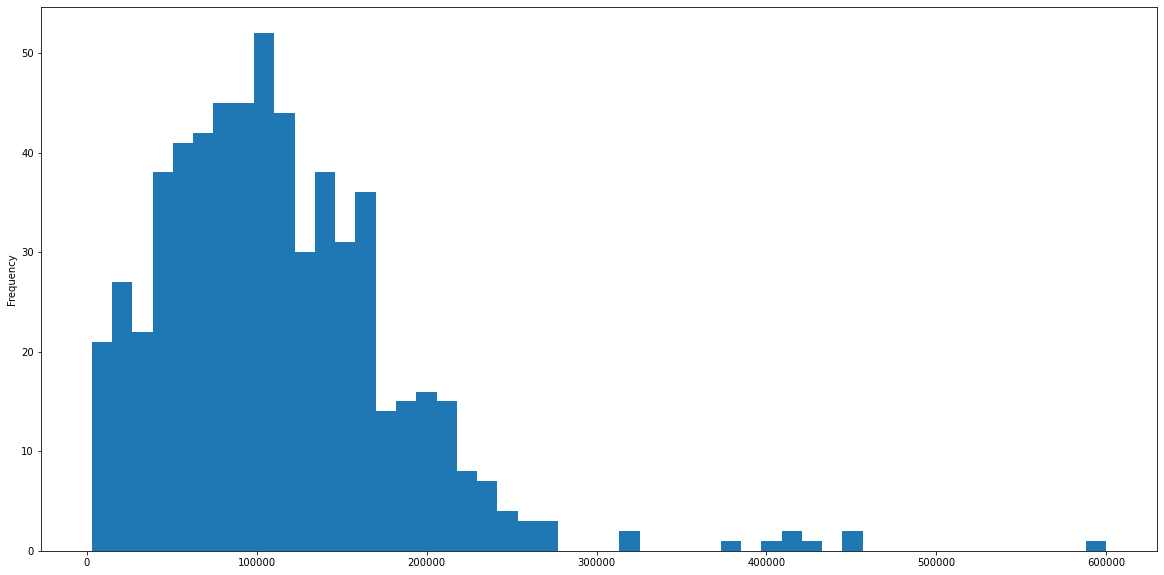

In [17]:
df['salary_in_usd'].plot(kind='hist', bins=50, figsize=(20,10))

In [48]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [51]:
df[['job_title','company_location']][0:10]

,job_title,company_location
0,Data Scientist,DE
1,Machine Learning Scientist,JP
2,Big Data Engineer,GB
3,Product Data Analyst,HN
4,Machine Learning Engineer,US
5,Data Analyst,US
6,Lead Data Scientist,US
7,Data Scientist,HU
8,Business Data Analyst,US
9,Lead Data Engineer,NZ


In [45]:
df['job_title'][0:10]

0                Data Scientist
1    Machine Learning Scientist
2             Big Data Engineer
3          Product Data Analyst
4     Machine Learning Engineer
5                  Data Analyst
6           Lead Data Scientist
7                Data Scientist
8         Business Data Analyst
9            Lead Data Engineer
Name: job_title, dtype: object

In [53]:
df['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Data Science Consultant                       7
Data Analytics Manager                        7
Director of Data Science                      7
Principal Data Scientist                      7
AI Scientist                                  7
Lead Data Engineer                            6
BI Data Analyst                               6
Computer Vision Engineer                      6
ML Engineer                                   6
Head of Data                                  5
Applied Data Scientist                        5
Business Data Analyst                   

In [55]:
df['job_title'].value_counts()[0:20]

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Data Science Consultant         7
Data Analytics Manager          7
Director of Data Science        7
Principal Data Scientist        7
AI Scientist                    7
Lead Data Engineer              6
BI Data Analyst                 6
Computer Vision Engineer        6
ML Engineer                     6
Head of Data                    5
Applied Data Scientist          5
Name: job_title, dtype: int64

<AxesSubplot:>

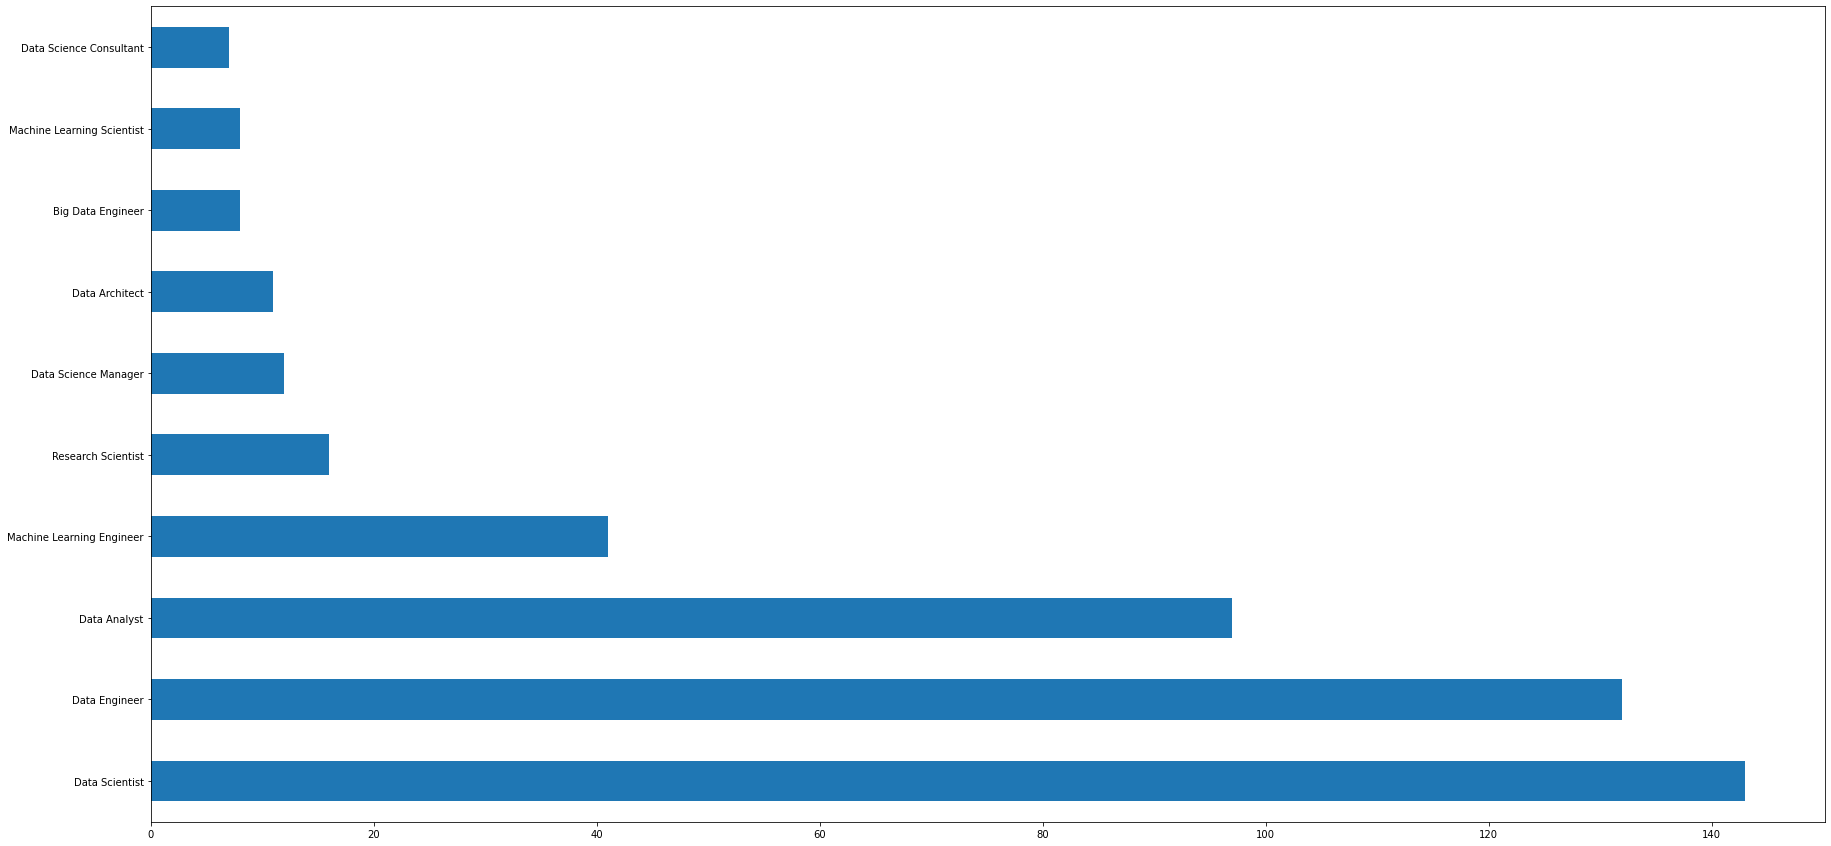

In [60]:
df['job_title'].value_counts()[0:10].plot(kind='barh', figsize=(30,15))

<AxesSubplot:ylabel='Frequency'>

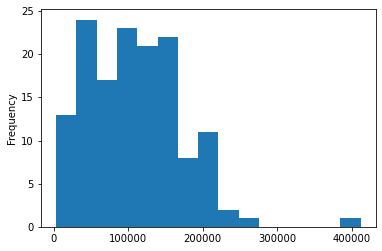

In [74]:
df[df['job_title']=='Data Scientist']['salary_in_usd'].plot(kind='hist',bins=15)

<AxesSubplot:>

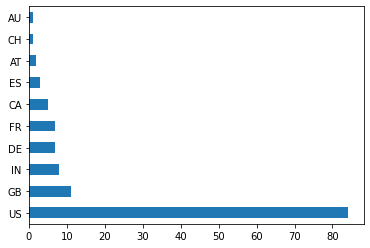

In [79]:
df[df['job_title']=='Data Scientist']['company_location'].value_counts()[0:10].plot(kind='barh')

# Which company location provides most remote work options?

<AxesSubplot:>

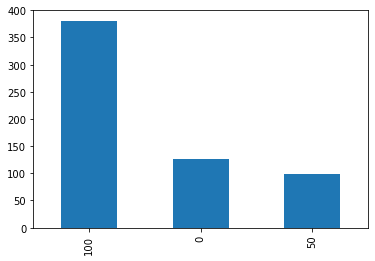

In [84]:
df['remote_ratio'].value_counts().plot(kind='bar')

In [9]:
df[df['job_title']=='Data Scientist'].salary

0         70000
7      11000000
10        45000
11      3000000
12        35000
         ...   
592      230000
593      150000
596      210000
598      160000
599      130000
Name: salary, Length: 143, dtype: int64

In [19]:
swiss_DS_salary=df[(df['salary_currency']=='EUR')].salary

In [20]:
swiss_DS_salary

0       70000
10      45000
12      35000
17     100000
22      42000
        ...  
500     57000
501     30000
507     59000
513     65000
517     62000
Name: salary, Length: 95, dtype: int64

In [21]:
df.salary_currency.unique()

array(['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD',
       'DKK', 'PLN', 'SGD', 'CLP', 'BRL', 'TRY', 'AUD', 'CHF'],
      dtype=object)

In [36]:
us_DS_salary=df[df['salary_currency']=='USD'].salary

In [37]:
us_DS_salary

1      260000
3       20000
4      150000
5       72000
6      190000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary, Length: 398, dtype: int64

In [85]:
df2 = pd.read_csv('/home/tifr/Desktop/salaries.csv')

In [87]:
df2.shape

(669, 11)

In [88]:
df.shape

(607, 12)

In [89]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [90]:
df2.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Data Engineer,74000,GBP,95535,GB,0,GB,M
1,2022,MI,FT,Data Engineer,50000,GBP,64551,GB,0,GB,M
2,2022,MI,FT,Data Scientist,58000,EUR,63143,DE,100,DE,S
3,2022,SE,FT,Data Science Manager,249260,USD,249260,US,0,US,M
4,2022,SE,FT,Data Science Manager,185400,USD,185400,US,0,US,M
